# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Poornima Devi M

# **Project Summary**

Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion.

This is where machine learning can play a vital role. By using historical data, a machine learning model can predict stock closing price. Regression analysis is a statistical method that uses a combination of independent variables to predict the value of a dependent variable, which is stock price. Here, we are going to create different Regression model to predict the Closing stock price. On the basis of different metrics, we are going to evaluate our model and try to find the best model of it. Also try to gain some insights in feature importance using various methods.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement for developing a Yes Bank stock closing price prediction ML model is to create an accurate and reliable forecasting model. The model should be trained on a subset of historical data and validated on another subset to ensure that it can accurately predict future stock prices.

Traditional methods of stock price analysis often fail to capture complex patterns and relationships in data. This project addressed the challenge of predicting Yes Bank’s closing stock prices by analyzing historical stock data. The goal is to build robust machine learning models to predict stock prices accurately, even in a volatile market scenario.



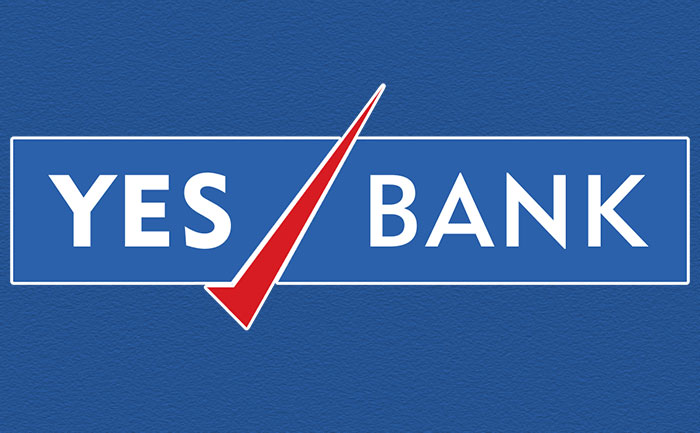

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [2]:
!pip install mplfinance

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mplfinance as mpf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')

import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [82]:
# Load Dataset
data=pd.read_csv("/content/drive/MyDrive/ColabNotebook/Module-6/data_YesBank_StockPrices.csv")

In [83]:
# Print the dataset
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset First View

In [7]:
# Dataset First Look
data.head()            # It prints the first default 5 rows of the dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [9]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


### What did you know about your dataset?

According to our data, the dataset contains 5 columns and 185 rows. where just one column is in date format and the others are formatted as float. This data does not contain any Null values and duplicate rows.

## ***2. Understanding Your Variables***

In [84]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [85]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

There are 5 variables in the dataset as follows

**Independent Variable**

1. Date : It has Month and Year
2. Open : Opening stock price for respective Month
3. High : Highest sotck price for respective Month
4. Low  : Lowest stock price for respective Month

**Dependent Variable**
5. Close : Closing price of Stock for respective Month

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
data.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [86]:
# Write your code to make your dataset analysis ready.
# Converting Date column from object type to Date format
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')
print(data['Date'])

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]


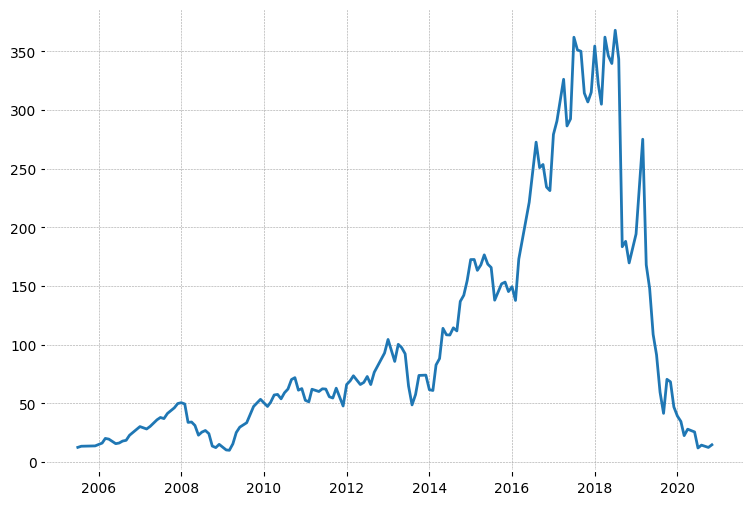

In [87]:
# Create a line plot to see the close price over the years
plt.figure(figsize=(9,6))
plt.plot(data['Date'],data['Close'])

In [88]:
# Taking a float Feature from the Data
numeric_fea = data.select_dtypes(include= 'float')
numeric_fea


,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41
...,...,...,...,...
180,25.60,28.30,11.10,11.95
181,12.00,17.16,11.85,14.37
182,14.30,15.34,12.75,13.15
183,13.30,14.01,12.11,12.42


### What all manipulations have you done and insights you found?

In Data wrangling, involved Converted Date column to Datetime Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

#### Chart - 1  Boxplot - To check outliers for each numerical column

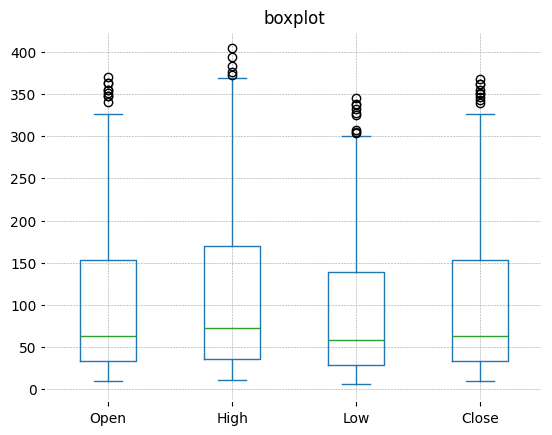

In [89]:
# Chart - 1 visualization code
# Create Boxplot to check outliers for each column
col = list(data.columns)       # Create a list to store all the numerical columns
ax = data[col].plot(kind='box', title='boxplot')

# Display the chart
plt.show()


In [90]:
# Normalizing all the float variables by using log transformation
norm = np.log10(data.iloc[:,1:])
print(norm)

         Open      High       Low     Close
0    1.113943  1.146128  1.051153  1.095518
1    1.099681  1.172603  1.098644  1.127753
2    1.129690  1.172311  1.088845  1.123852
3    1.120574  1.160469  1.093422  1.113609
4    1.125481  1.142389  1.109916  1.127429
..        ...       ...       ...       ...
180  1.408240  1.451786  1.045323  1.077368
181  1.079181  1.234517  1.073718  1.157457
182  1.155336  1.185825  1.105510  1.118926
183  1.123852  1.146438  1.083144  1.094122
184  1.093772  1.173186  1.086716  1.166430

[185 rows x 4 columns]


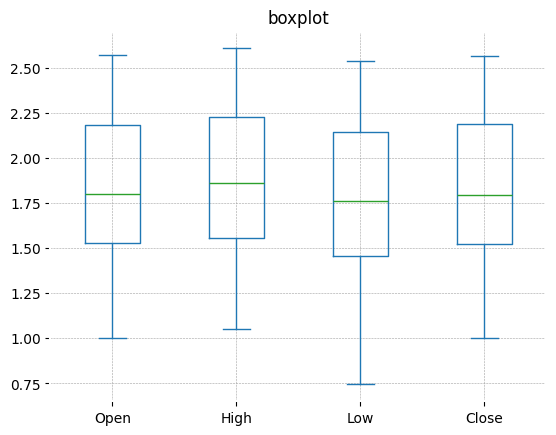

In [91]:
# Create Boxplot to check outliers with normalized data
col = list(norm.columns)       # Create a list to store all the float variables
ax = norm[col].plot(kind='box', title='boxplot')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

Box plot is a graphical representation of the distribution of a dataset.
By using boxplot, visually we can see the outliers.

##### 2. What is/are the insight(s) found from the chart?

In this chart, we could see some outliers in the dataset. After normalization, when we are checking outliers, there is no outliers present in the dataset.

#### Chart - 2  Distribution Plot for all numerical columns

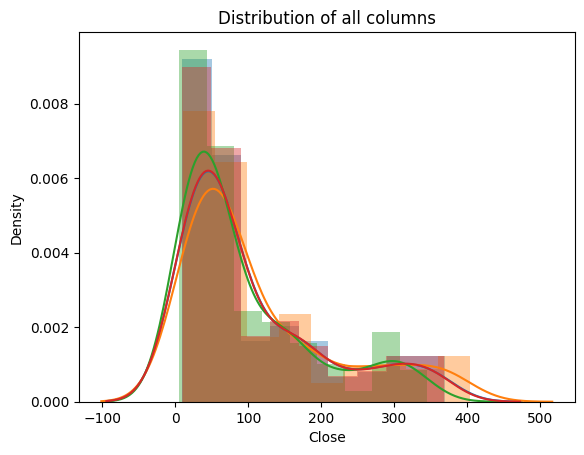

In [21]:
# Chart - 2 visualization code
# To see the distribution for all the columns
# Create distribution plot by using seaborn library
sns.distplot(data['Open'],kde=True)
sns.distplot(data['High'],kde=True)
sns.distplot(data['Low'],kde=True)
sns.distplot(data['Close'],kde=True)
# Giving title to the chart
plt.title("Distribution of all columns")

# Display the chart
plt.show()


<Axes: xlabel='Close', ylabel='Density'>

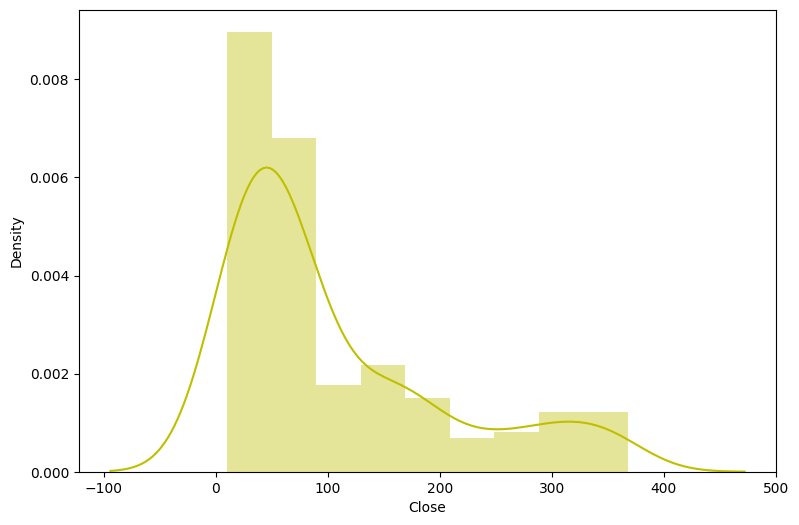

In [22]:
# Specifically, to understand the Distribution of Data for Close column which is target variable
# Create a figure with custom size
plt.figure(figsize=(9,6))
# Create a distribution plot by using seaborn library
sns.distplot(data['Close'],color='y')

<Axes: xlabel='Close', ylabel='Density'>

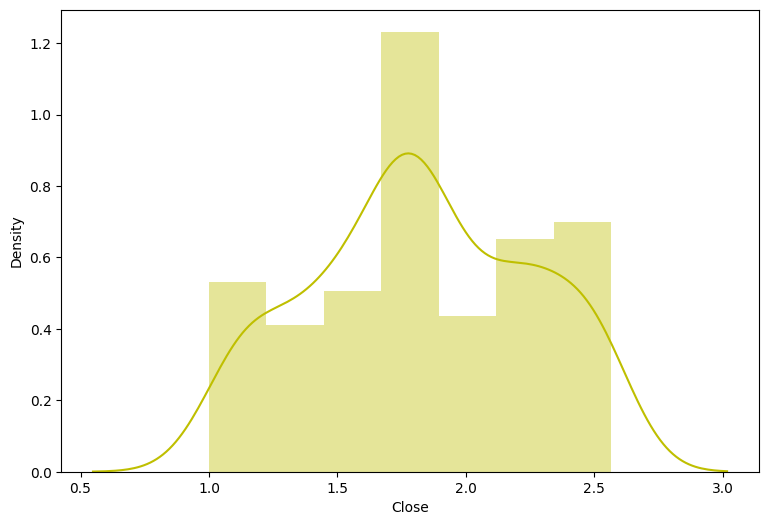

In [23]:
# Normalizing the close column data by using log transformation
# To understand the distribution of data after normalization

# Create a figure with custom size
plt.figure(figsize=(9,6))
# Create distribution plot by using seaborn library
sns.distplot(np.log10(data["Close"]),color='y')

##### 1. Why did you pick the specific chart?

A distribution plot can provide useful insights into its distribution, shape, and potential outliers.

By visualizing the distribution of the target variable, we can gain a better understanding of its central tendency (i.e., the mean, median, and mode), spread (i.e., the range, variance, and standard deviation), skewness (i.e., whether it's symmetric or skewed), and any potential outliers.

This information can be helpful in selecting an appropriate ML algorithm for predicting the target variable, as well as in identifying any potential issues with the data (e.g., non-normality, extreme values) that may need to be addressed before training the model.

##### 2. What is/are the insight(s) found from the chart?

A distribution plot of the closing price variable can provide several insights, including:




*  **The shape of the distribution:** The shape of the distribution is skewed right (i.e., positively skewed). A skewed distribution suggests that the closing price is more concentrated on one side of the mean. So for having better model we need to make our target variable symmetrically distributed by using log transformation.
*  **The presence of outliers:** Outliers are data points that are significantly different from the rest of the data. By examining the distribution plot, we can identify any potential outliers that may need to be addressed before training the model.







#### Chart - 3 Histogram Plot for each independent variables

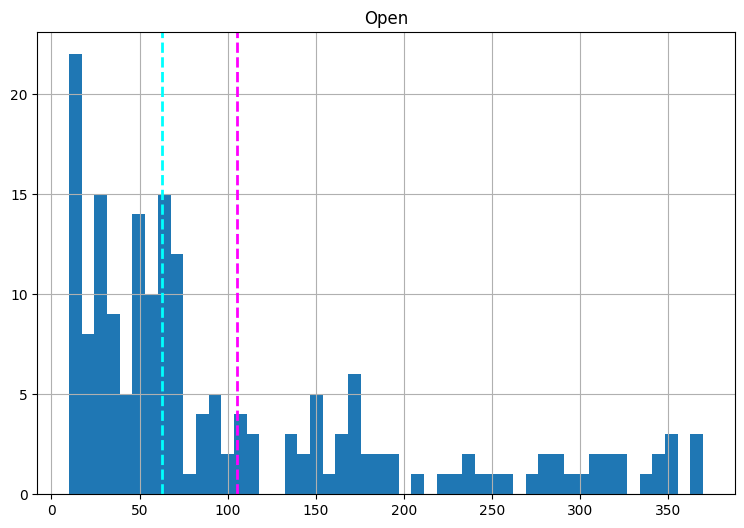

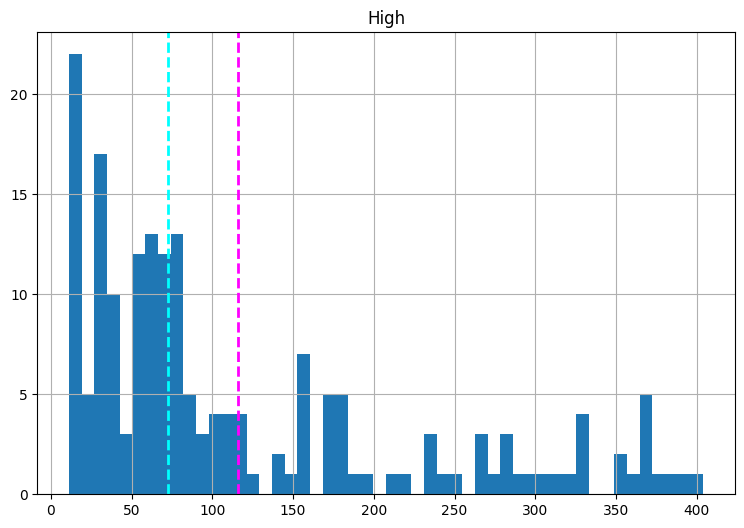

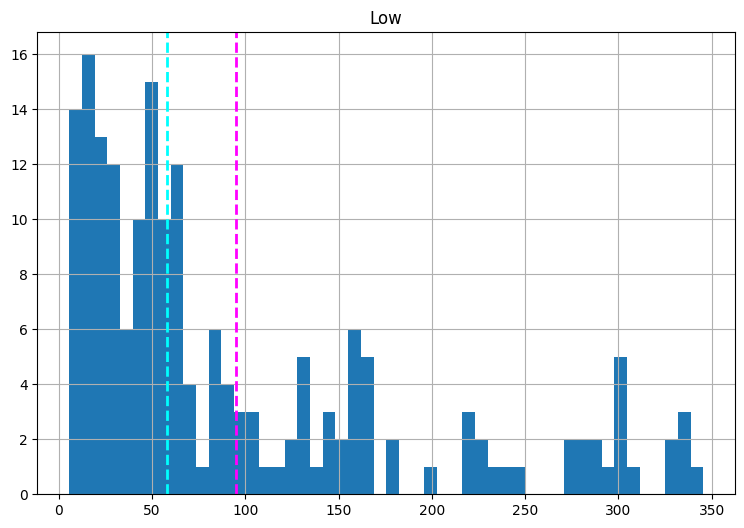

In [24]:
# Chart - 3 visualization code
# Plotting Histogram for each independent column in Data.
for col in numeric_fea.iloc[:,:-1]:
  # Create a figure with custom size
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  # Create a histogram plot
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Histogram plot are used to visualize the distribution of a single variable. Here histograms used to visualize the distribution of independent variables. Also I plotted mean and median lines for better understanding of skewness of data.

##### 2. What is/are the insight(s) found from the chart?

The shape of the distribution of independent variables skewed right. This information can help to determine the appropriate statistical approach for regression.

##**Bivariate Analysis**

#### Chart - 4   Scatter Plots for each Independent variables and Dependent variable

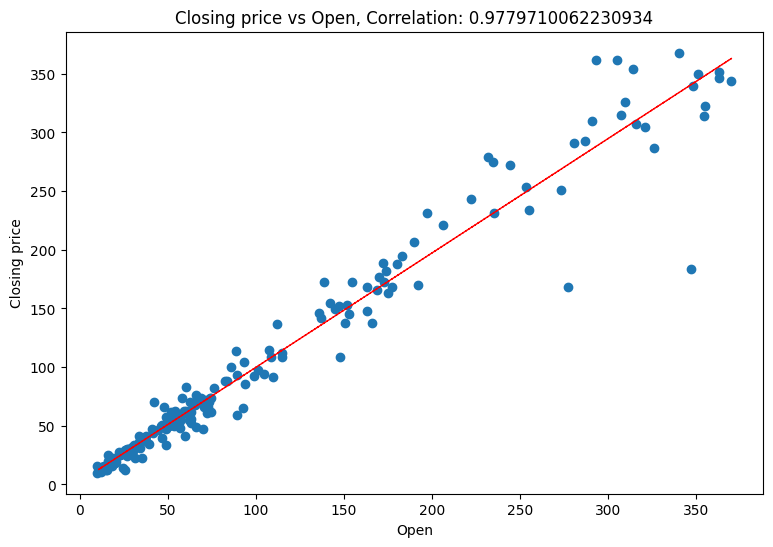

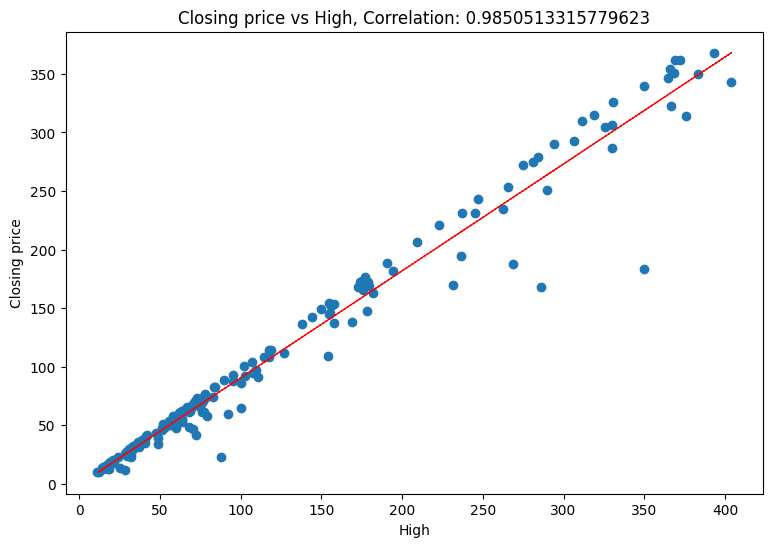

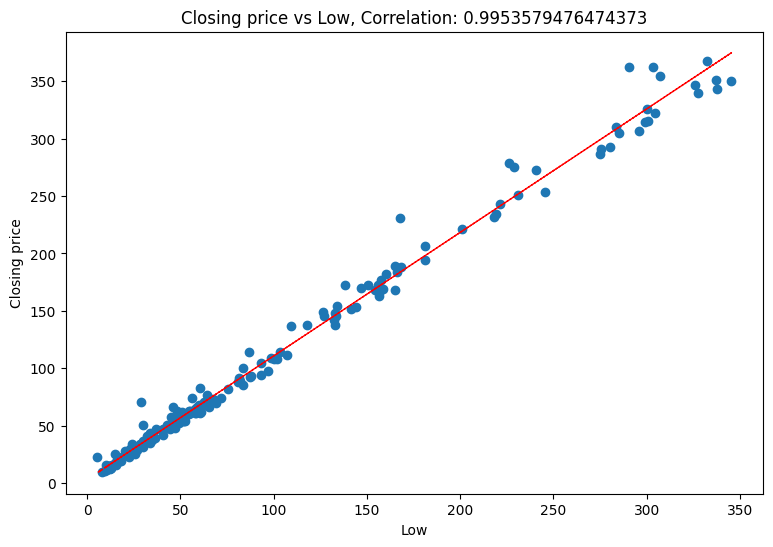

In [25]:
# Chart - 4 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for col in numeric_fea.iloc[:, :-1]:
  # Create a figure with custom size
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  label=data["Close"]
  correlation=feature.corr(label)
  # Create a scatter plot
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing price vs '+col+', Correlation: '+str(correlation))
  z=np.polyfit(data[col],data['Close'],1)
  y_hat=np.poly1d(z)(data[col])
  # Create a line plot to see the fitting line
  plt.plot(data[col],y_hat,"r--",lw=1)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a common and useful visualization technique to explore the relationship between a dependent variable (i.e., Yes Bank stock closing price) and one or more independent variables. In a scatter plot, each observation is represented as a point on the graph, with the independent variable plotted on the x-axis and the dependent variable plotted on the y-axis.

By examining the scatter plot, we can identify any patterns or relationships between the two variables. For example, if the points on the scatter plot are closely clustered around a straight line, this suggests a strong linear relationship between the two variables. On the other hand, if the points on the scatter plot are more spread out and do not appear to form a straight line, this suggests a weaker relationship or no relationship at all.

By examining the scatter plot, we can determine whether there is a strong or weak relationship between the closing price and the independent variable(s), and whether this relationship is linear or nonlinear. This information can be used to inform the selection of appropriate ML algorithms for predicting the closing price, and to identify any potential issues with the data that may need to be addressed before training the ML model.

##### 2. What is/are the insight(s) found from the chart?

From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

#### Chart - 5 CandleStick Chart

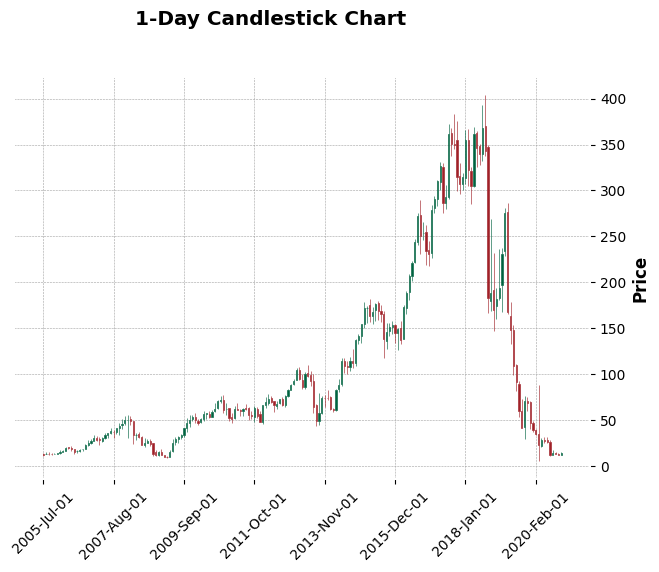

In [26]:
# Chart - 5 visualization code
# Setting date column as index
data.set_index("Date", inplace=True)

# Plot Candlestick Chart
mpf.plot(data, type="candle", style="charles", title="1-Day Candlestick Chart", ylabel="Price")

##### 1. Why did you pick the specific chart?

In this visualization, A 1-day candlestick chart provides valuable insights into market behavior and price action.

##### 2. What is/are the insight(s) found from the chart?

In this chart, we can analyze Trend Identification, Price reversal and patterns, Market Sentiment, Volatility and momentum, Support & Resistance Levels, Gap Analysis, Volume Confirmation.

**Insights:**

*   Uptrend with signs of exhaustion on Jan 3.
*   If the next day's candle breaks 112 (High of Jan 3), the uptrend may continue.
*   If the price drops below 104 (Low of Jan 3), a bearish reversal could start.





#### Chart - 6 - Correlation Heatmap

<Axes: >

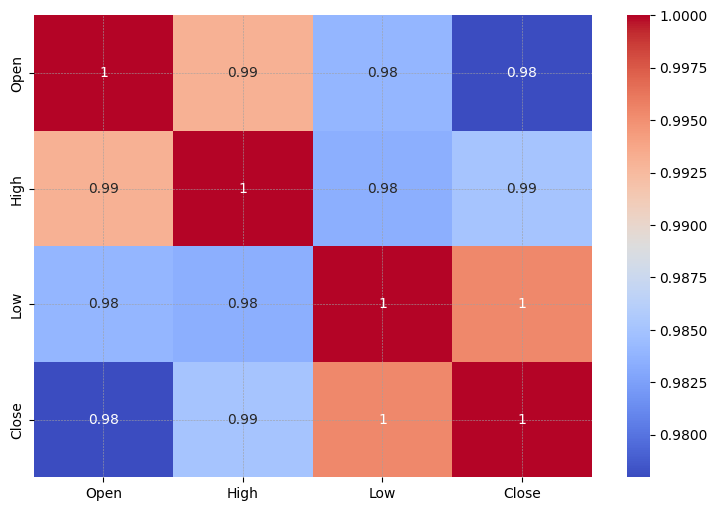

In [27]:
# Correlation Heatmap visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(9,6))
cor=data.corr()
sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables).

##### 2. What is/are the insight(s) found from the chart?

In this correlation chart, we can see that our data is Multicollinear. Multicollinearity can cause problems for some ML algorithms, such as linear regression, because it can lead to overfitting and unreliable coefficient estimates. By identifying variables with high correlations, we can decide whether to remove one of the variables or to use a different ML algorithm that is less sensitive to multicollinearity.

#### Chart - 7 - Pair Plot

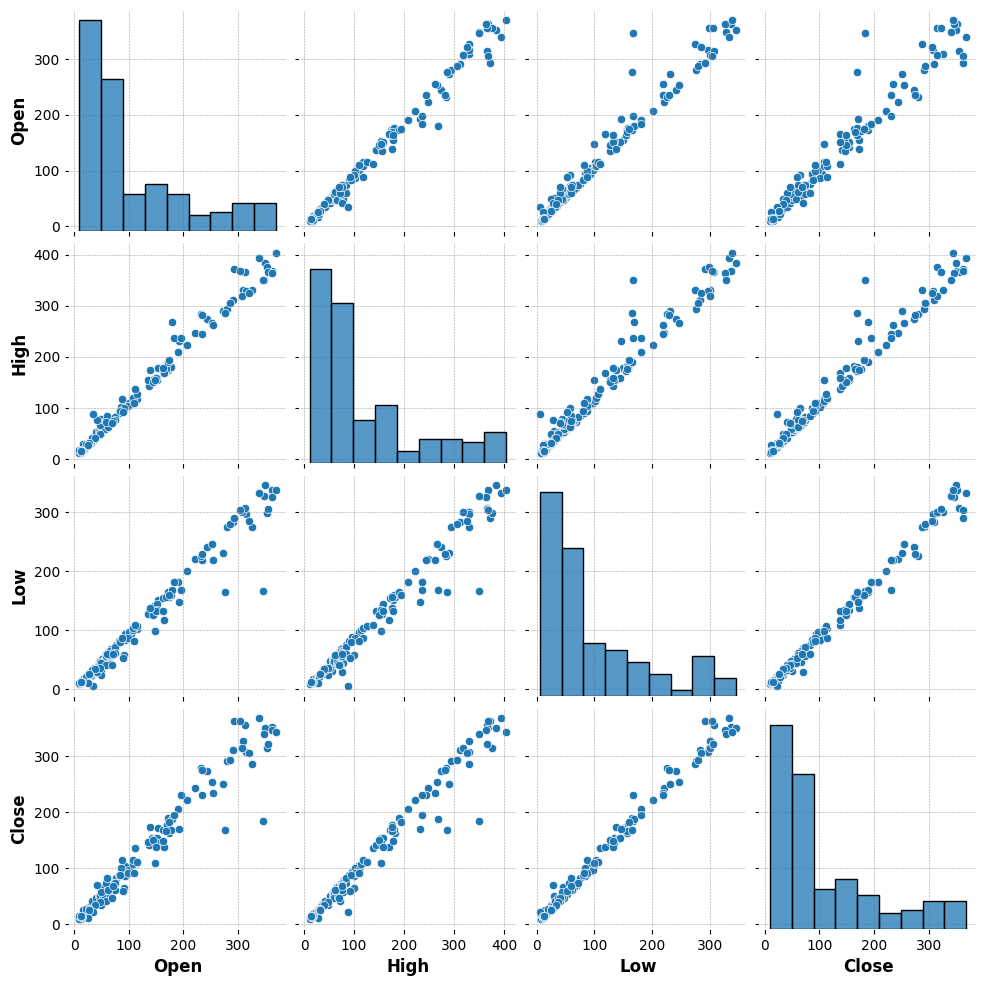

In [28]:
# Pair Plot visualization code
# Create pairplot to understand the relationship between variables and distribution of variables
sns.pairplot(data)
# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

This visualization displays pairwise relationships between numerical variables in a dataset. It is commonly used for exploratory data analysis(EDA) to identify correlations, trends, and outliers.



##### 2. What is/are the insight(s) found from the chart?

This pair plot reveals relationship between all the numerical columns such as Open, High, Low, Close. Here we could see all the columns are positively correlated between them.

## ***6. Feature Engineering & Data Pre-processing***

In [29]:
# Again Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/ColabNotebook/Module-6/data_YesBank_StockPrices.csv")

### 1. Data Scaling

In [30]:
# Scaling your data
# Separating Dependent and Independent variable
X= np.log10(df.iloc[:, 1:-1]) # Normalizing the data using log transformation
y=np.log10(df['Close']) # Normalizing the data using log transformation

##### Which method have you used to scale you data and why?

We used log transformation to scale the data. Because this method applies a logarithmic transformation to the data, which can help us to normalize skewed data and reduce the impact of outliers.

### 2. Data Splitting

In [31]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

Data splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model on an independent dataset. We used 80-20 split to split data.

80:20 split - In this split, the dataset is divided into two parts - training set and testing set. The training set contains 80% of the data, while the testing set contains the remaining 20% of the data. This split is commonly used when the dataset is large and the model requires significant training time. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [32]:
# ML Model - 1 Implementation
reg = LinearRegression()

# Fit the Algorithm
reg.fit(X_train,y_train)

# Predict on the model
y_pred=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [33]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error value
mse=mean_squared_error(10**(y_test),10**(y_pred))   # 10** to convert back log10 that we used while making it normalised

# Calculating RMSE score
rmse=np.sqrt(mse)

# Calculating R2 metric score
r2=r2_score(10**(y_test),10**(y_pred))

# Calculating Adjusted R2 value
Adjusted_R2=(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Calculating Mean Absolute Error value
mae = mean_absolute_error(y_test, y_pred)

In [34]:
# Create a dataframe for all these metric scores with model
eval=pd.DataFrame([mse,rmse,r2,Adjusted_R2,mae],columns=['Linear'],index=['MSE','RMSE','R2','Adj R2','MAE'])
# Print the metrics dataframe
eval

,Linear
MSE,70.420406
RMSE,8.391687
R2,0.993744
Adj R2,0.993175
MAE,0.017328


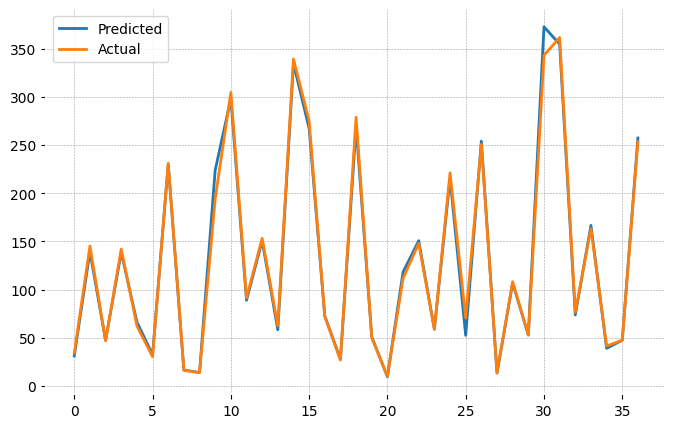

In [35]:
# Visualization of predicted and Actual data
# Create a figure with custom size
plt.figure(figsize=(8,5))
# Create a line plot for predicted and actual data
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Linear regression predicts the relationship between two variables by assuming they have a straight-line connection. By looking above metrics dataframe, we could see that our linear regression model is giving better results but will compare with other linear models, Which model is giving better prediction.

### ML Model - 2   Lasso Regression

In [36]:
# ML Model - 2 Implementation
lasso=Lasso(alpha=0.1)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_l=lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [37]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error value
mse_l=mean_squared_error(10**(y_test),10**(y_pred_l)) #10** to convert back log10 that we used while making it normalised

# Calculating RMSE score
rmse_l=np.sqrt(mse_l)

# Calculating R2 metric score
r2_l=r2_score(10**(y_test),10**(y_pred_l))

# Calculating Adjusted R2 value
Adjusted_R2_l=(1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Calculating Mean Absolute Error value
mae_l = mean_absolute_error(y_test, y_pred_l)

In [38]:
# Create a dataframe for all these metric scores with model
eval_l=pd.DataFrame([mse_l,rmse_l,r2_l,Adjusted_R2_l,mae_l],columns=['Lasso'],index=['MSE','RMSE','R2','Adj R2','MAE'])

# Concating our metrics of new model into our metrics Dataframe
eval=pd.concat([eval,eval_l],axis=1)

In [39]:
# Print the metrics dataframe
eval

,Linear,Lasso
MSE,70.420406,8552.042521
RMSE,8.391687,92.477254
R2,0.993744,0.240217
Adj R2,0.993175,0.171146
MAE,0.017328,0.220050


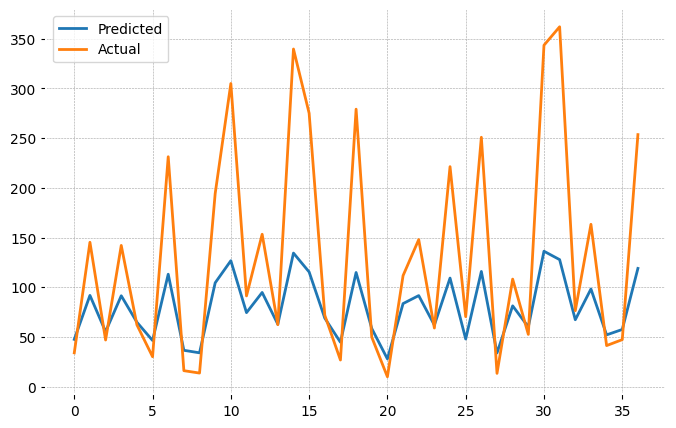

In [40]:
# Visualization of predicted and Actual data
# Create a figure with custom size
plt.figure(figsize=(8,5))
# Create a line plot for predicted and actual data
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [41]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
# Giving parameter values to the model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lcv=lasso_regressor.predict(X_test)

In [42]:
# Print best fit alpha value
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
# Print the best score
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [43]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error value
mse_lcv=mean_squared_error(10**(y_test),10**(y_pred_lcv)) #10** to convert back log10 that we used while making it normalised

# Calculating RMSE score
rmse_lcv=np.sqrt(mse_lcv)

# Calculating R2 metric score
r2_lcv=r2_score(10**(y_test),10**(y_pred_lcv))

# Calculating Adjusted R2 value
Adjusted_R2_lcv=(1-(1-r2_score(10**(y_test), 10**(y_pred_lcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Calculating Mean Absolute Error value
mae_lcv = mean_absolute_error(y_test, y_pred_lcv)

In [44]:
# Create a dataframe for all these metric scores with model
eval_lcv=pd.DataFrame([mse_lcv,rmse_lcv,r2_lcv,Adjusted_R2_lcv,mae_lcv],columns=['Lasso CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])

# Concating our metrics of new model into our metrics Dataframe
eval=pd.concat([eval,eval_lcv],axis=1) # Concating our metrics of new model into our metrics Dataframe

In [45]:
# Print the metrics dataframe
eval

,Linear,Lasso,Lasso CV
MSE,70.420406,8552.042521,70.224612
RMSE,8.391687,92.477254,8.380013
R2,0.993744,0.240217,0.993761
Adj R2,0.993175,0.171146,0.993194
MAE,0.017328,0.220050,0.017386


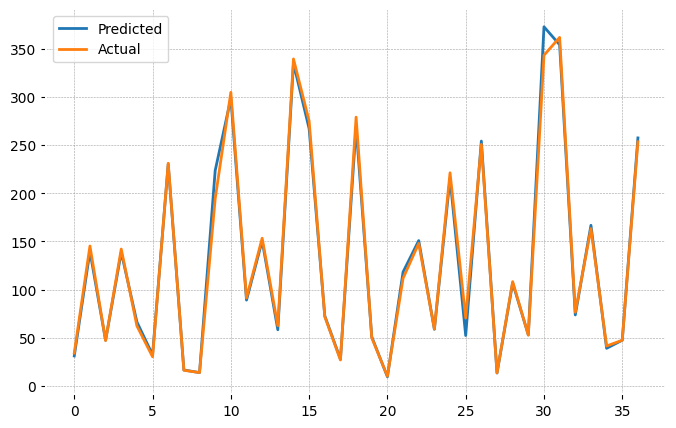

In [46]:
# Visualization of predicted and Actual data
# Create a figure with custom size
plt.figure(figsize=(8,5))
# Create a line plot for predicted and actual data
plt.plot(10**(y_pred_lcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Lasso regression is a regularization technique, it is used over regression methods for a more accurate prediction. By looking above metrics dataframe, we could see that our lasso regression model is giving better results compared to the before linear model.

### ML Model - 3  Ridge Regression

In [47]:
# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_pred_r = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [48]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error value
mse_r=mean_squared_error(10**(y_test),10**(y_pred_r)) #10** to convert back log10 that we used while making it normalised

# Calculating RMSE value
rmse_r=np.sqrt(mse_r)

# Calculating R2 metric score
r2_r=r2_score(10**(y_test),10**(y_pred_r))

# Calculating Adjusted R2 value
Adjusted_R2_r=1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

# Calculating Mean Absolute Error value
mae_r= mean_absolute_error(y_test, y_pred_r)

In [49]:
# Create a dataframe for all these metric scores with model
eval_r=pd.DataFrame([mse_r,rmse_r,r2_r,Adjusted_R2_r,mae_r],columns=['Ridge'],index=['MSE','RMSE','R2','Adj R2','MAE'])
# Concating our metrics of new model into our metrics Dataframe
eval=pd.concat([eval,eval_r],axis=1)

In [50]:
# Print the metric dataframe
eval

,Linear,Lasso,Lasso CV,Ridge
MSE,70.420406,8552.042521,70.224612,166.335296
RMSE,8.391687,92.477254,8.380013,12.897104
R2,0.993744,0.240217,0.993761,0.985222
Adj R2,0.993175,0.171146,0.993194,0.983879
MAE,0.017328,0.220050,0.017386,0.023654


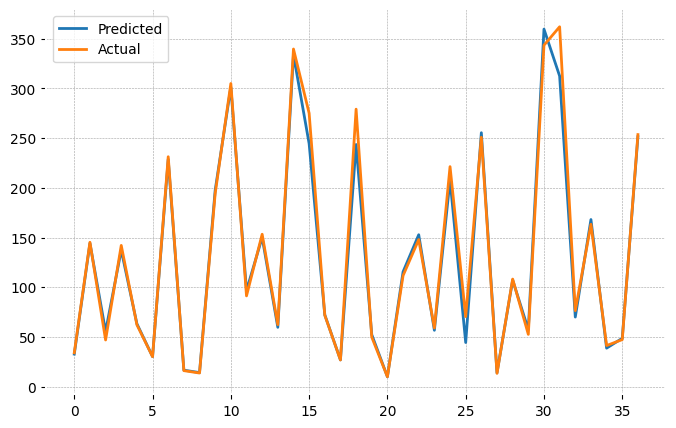

In [51]:
# Visualization of predicted and Actual data
# Create a figure with custom size
plt.figure(figsize=(8,5))
# Create a line plot for predicted and actual data
plt.plot(10**(y_pred_r))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
# Giving parameter values to the model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_rcv=ridge_regressor.predict(X_test)

In [53]:
# Print best fit alpha value
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
# Print the best score
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528889


In [54]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error value
mse_rcv=mean_squared_error(10**(y_test),10**(y_pred_rcv))   # 10** to convert back log10 that we used while making it normalised

# Calculating RMSE score
rmse_rcv=np.sqrt(mse_rcv)

# Calculating R2 metric score
r2_rcv=r2_score(10**(y_test),10**(y_pred_rcv))

# Calculating Adjusted R2 value
Adjusted_R2_rcv=1-(1-r2_score(10**(y_test), 10**(y_pred_rcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

# Calculating Mean Absolute Error value
mae_rcv= mean_absolute_error(y_test, y_pred_rcv)

In [55]:
# Create a dataframe for all these metric scores with model
eval_rcv=pd.DataFrame([mse_rcv,rmse_rcv,r2_rcv,Adjusted_R2_rcv,mae_rcv],columns=['Ridge CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])

# Concating our metrics of new model into our metrics Dataframe
eval=pd.concat([eval,eval_rcv],axis=1)

In [56]:
# Print the metric dataframe
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786
R2,0.993744,0.240217,0.993761,0.985222,0.993784
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219
MAE,0.017328,0.220050,0.017386,0.023654,0.017567


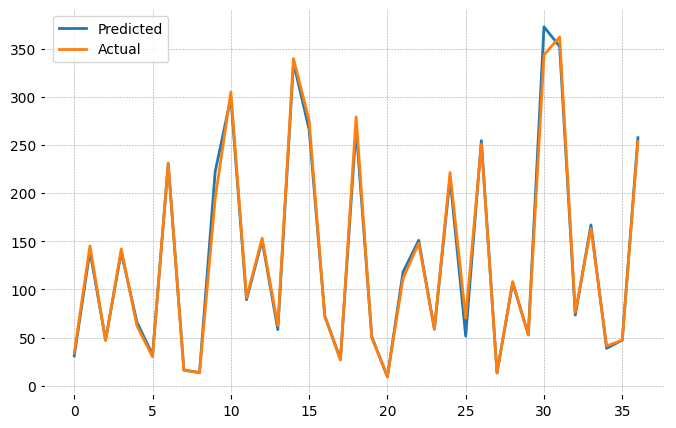

In [57]:
# Visualization of predicted and Actual data after hyperparameter tuning
# Create a figure with custom size
plt.figure(figsize=(8,5))
# Create a line plot for predicted and actual data
plt.plot(10**(y_pred_rcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Ridge regression can help to improve the generalization performance of a model by reducing the impact of multicollinearity and high-dimensional data.
By looking above metrics dataframe, we could see that our Ridge regression is giving better results compared to the previous models.

### ML Model - 4  ElasticNet Regression

In [58]:
# ML Model - 4 Implementation
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the Algorithm
elasticnet.fit(X_train,y_train)

# Predict on the model
y_pred_e=elasticnet.predict(X_test)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error value
mse_e=mean_squared_error(10**(y_test),10**(y_pred_e))  # 10** to convert back log10 that we used while making it normalised

# Calculating RMSE score
rmse_e=np.sqrt(mse_e)

# Calculating R2 metric score
r2_e=r2_score(10**(y_test),10**(y_pred_e))

# Calculating Adjusted R2 value
Adjusted_R2_e=1-(1-r2_score(10**(y_test), 10**(y_pred_e)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

# Calculating Mean Absolute Error value
mae_e= mean_absolute_error(y_test, y_pred_e)

In [60]:
# Create a dataframe for all these metric scores with model
eval_e=pd.DataFrame([mse_e,rmse_e,r2_e,Adjusted_R2_e,mae_e],columns=['Elastic'],index=['MSE','RMSE','R2','Adj R2','MAE'])

# Concating our metrics of new model into our metrics Dataframe
eval=pd.concat([eval,eval_e],axis=1)

In [61]:
# Print the metrics dataframe
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV,Elastic
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639,7069.422528
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786,84.079858
R2,0.993744,0.240217,0.993761,0.985222,0.993784,0.371936
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219,0.314840
MAE,0.017328,0.220050,0.017386,0.023654,0.017567,0.189681


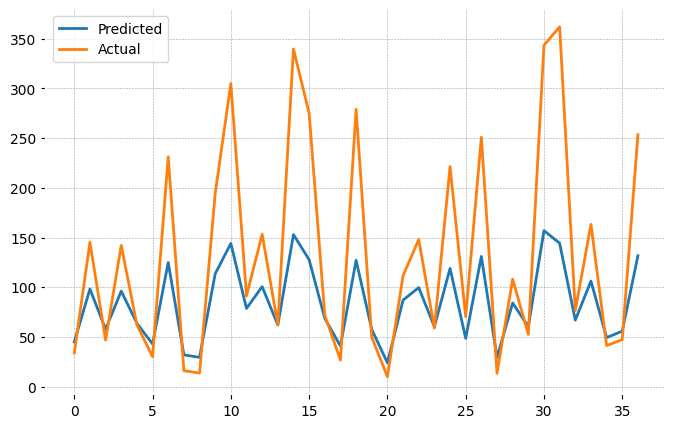

In [62]:
# Visualization of predicted and Actual data
# Create a figure with custom size
plt.figure(figsize=(8,5))

# Create a line plot for predicted and actual data
plt.plot(10**(y_pred_e))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()

# Giving parameter values to the model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_ecv = elastic_regressor.predict(X_test)

In [64]:
# Print best fit alpha value
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
# Print the best score
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.3}

Using  {'alpha': 1e-05, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.0011533635660191343


In [65]:
# Calculating different Metric Scores for this model
# Calculating Mean Squared Error score
mse_ecv=mean_squared_error(10**(y_test),10**(y_pred_ecv))

# Calculating RMSE score
rmse_ecv=np.sqrt(mse_ecv)

# Calculating R2 metric score
r2_ecv=r2_score(10**(y_test),10**(y_pred_ecv))

# Calculating Adjusted R2 value
Adjusted_R2_ecv=1-(1-r2_score(10**(y_test), 10**(y_pred_ecv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

# Calculating Mean Absolute Error value
mae_ecv= mean_absolute_error(y_test, y_pred_ecv)

In [66]:
# Create a dataframe for all these metric scores with model
eval_ecv=pd.DataFrame([mse_ecv,rmse_ecv,r2_ecv,Adjusted_R2_ecv,mae_ecv],columns=['Elastic CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])
# Concating our metrics of new model into our metrics Dataframe
eval=pd.concat([eval,eval_ecv],axis=1)

In [67]:
# Print the metrics dataframe
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV,Elastic,Elastic CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639,7069.422528,70.265093
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786,84.079858,8.382428
R2,0.993744,0.240217,0.993761,0.985222,0.993784,0.371936,0.993757
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219,0.314840,0.993190
MAE,0.017328,0.220050,0.017386,0.023654,0.017567,0.189681,0.017371


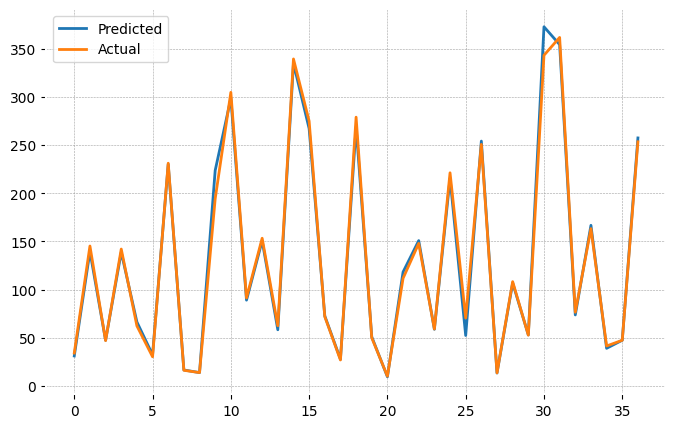

In [68]:
# Visualization of predicted and Actual data after the hyperparameter tuning
# Create a figure with custom size
plt.figure(figsize=(8,5))
# Create a line plot for predicted and actual data
plt.plot(10**(y_pred_ecv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])

# Display the chart
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here, we used GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. By looking above metrics dataframe, we could see that our ElasticNet regression is giving different metric scores.
Here, when compared with all other linear models, Ridge CV is performing better prediction than other models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here we considered Mean Squared Error (MSE) and Adjusted R2 (Adj R2) as evalution metrics. MSE and Adj R2 as evaluation metrics can have the following positive impacts:

Improved accuracy of predictions: By optimizing a model's performance based on MSE and Adj R2, businesses can improve the accuracy of their predictions. This can lead to better decision-making, improved resource allocation, and reduced costs associated with errors or inefficiencies.
Improved model selection: By comparing the performance of different models based on MSE and Adj R2, businesses can select the best model for their specific problem. This can lead to improved performance and better outcomes for the business.
Overall, using MSE and Adj R2 as evaluation metrics can help businesses improve the accuracy of their predictions, gain insights into their data and make better decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

So as we decided our evalution metrics as MSE and Adj R2, On the basis of it, we chosen our best ML model as Ridge CV.

Ridge regression can help to improve the generalization performance of a model by reducing the impact of multicollinearity and high-dimensional data. However, the choice of the regularization parameter alpha can have a significant impact on the performance of the model.

we choose RidgeCV to estimate the optimal value of the regularization parameter alpha and to ensure that our model is less likely to overfit the training data. By using cross-validation to estimate the optimal value of alpha, we can build a more robust and generalizable model that can perform well on new data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [69]:
# RidgeCV Model after Hyperparameter tunning
best_model=Ridge(alpha=0.01)

In [70]:
# Fit a data with best model
best_model.fit(X_train,y_train)

Ridge(alpha=0.01)

In [71]:
# Look at the data at glance
X_train.head()

,Open,High,Low
113,2.152533,2.190332,2.127105
8,1.209515,1.321184,1.204663
96,1.965672,2.001734,1.761251
170,1.774517,1.860637,1.612254
45,1.001734,1.243286,0.997386


In [72]:
# Coefficient of the best model
best_model.coef_

array([-0.49764104,  0.7878188 ,  0.71306446])

### Interpret the model results with SHAP values

In [73]:
# Initialize the SHAP explainer with the final model
explainer = shap.KernelExplainer(best_model.predict, X_train)

In [74]:
# Compute shap values
shap_values = explainer.shap_values(X_test)

  0%|          | 0/37 [00:00<?, ?it/s]

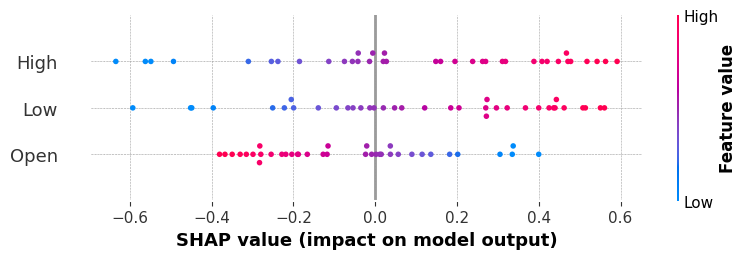

In [75]:
# creating a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test)

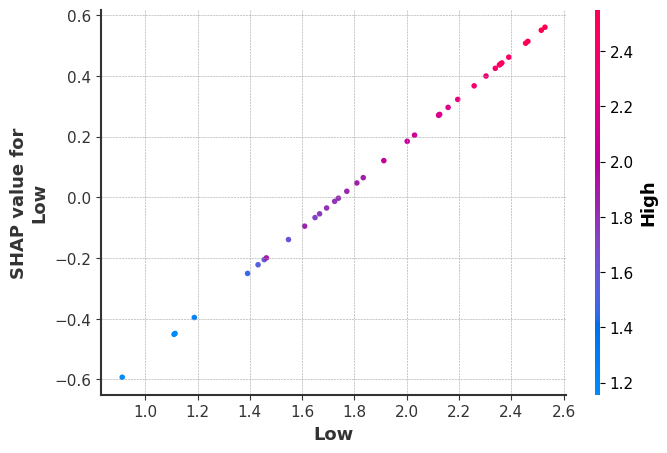

In [76]:
# creating a dependence plot for a specific feature
shap.dependence_plot('Low', shap_values, X_test)

As we chosen our best performing model as RidgeCV. On the basis of our Hyperparameter Tunning, we get our Alpha as 0.01. Here, we are going to check feature importance with two methods are as follows:

**Coefficient:** By looking at the coefficient of model we can say that High has most impact on target variable where as Open has negative correlation with target variable

**SHAP:** SHAP values quantify the contribution of each feature to the predicted outcome for a particular instance. The summary plot shows the features ranked in descending order of importance, based on the mean absolute SHAP values are calculated for each instance in the test set. By examining the summary plot, we can identify High and Low have the strongest impact on the model's predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File
import joblib
joblib.dump(best_model, 'best_model.joblib') # saving best model in joblib file

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data
model = joblib.load('best_model.joblib')

model.predict(X_test)


array([1.49281821, 2.1460464 , 1.67820951, 2.14246687, 1.82078283,
       1.50592846, 2.36237019, 1.21581071, 1.13812524, 2.34689825,
       2.47580699, 1.95136563, 2.1784055 , 1.76583469, 2.52555747,
       2.42499701, 1.86105797, 1.44089765, 2.42766349, 1.70736326,
       0.97288958, 2.07250228, 2.17892937, 1.76813804, 2.33331037,
       1.71279947, 2.40565057, 1.1239751 , 2.02918406, 1.72541452,
       2.5712468 , 2.54678161, 1.86589544, 2.22259265, 1.59034463,
       1.67605547, 2.41074454])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

 We build a model on Yes bank Stock Closing price prediction, we want to conclude that Data has multicollinearity. So, We dealed with that data, then we preferred to go for different regularization techniques with cross validation. We implemented different models on our dataset in order to predict the closing price. On the basis of Mean Squared Error (MSE) and Adjusted R2 (Adj r2) score, we found our best performing model is RidgeCV with minimal error. With respective model we tried to do some feature importance for model, Where we found that High is most impacting feature for target variable and Open is negativley impacting the target variable.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***